# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# random.seed(42)
r = np.random.RandomState(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

шобы псевдорандом был зафиксирован и результаты можно было воспроизвести при повторном запуске ноута

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [121]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
pd.read_csv('response.csv', index_col=0)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,predicts
0,-0.837167,1.565740,-1.362605,2.200379,0.761548,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,611351.610939
1,0.872122,-0.814974,0.519155,0.139102,0.650920,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,880435.677455
2,-1.569719,2.405866,-1.638596,0.760986,1.330489,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,805906.938496
3,0.383754,1.648982,1.422399,0.141162,0.338003,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,672408.498694
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.724021,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69862.536108


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10, random_state=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3696,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
1486,Maruti Ertiga SHVS LDI Option,2016,756000,70000,Diesel,Individual,Manual,Second Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0
785,Audi A4 2.0 TDI,2014,1600000,44000,Diesel,Individual,Automatic,Second Owner,16.55 kmpl,1968 CC,147.51 bhp,320Nm@ 1750-2500rpm,5.0
873,Fiat Punto 1.3 Emotion,2013,350000,160254,Diesel,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
3210,Maruti Swift ZDI BSIV,2017,640000,35000,Diesel,Individual,Manual,Second Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
2314,Maruti Swift Dzire VDI,2014,490000,50000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6507,Hyundai Verna 1.6 SX VTVT AT,2012,475000,83000,Petrol,Individual,Automatic,First Owner,15.74 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
6835,Mahindra TUV 300 T6 Plus,2015,600000,80000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0
6639,Mahindra Bolero SLE BSIII,2011,400000,70000,Diesel,Individual,Manual,Second Owner,13.6 kmpl,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.0
2602,Maruti Alto LXi,2012,180000,70000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
display(df_train.describe(), df_train.describe(exclude=[np.number]))

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [7]:
display(df_test.describe(), df_test.describe(exclude=[np.number]))

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
print('train')
display(df_train.isna().sum())
print('---------------------')
print('test')
display(df_test.isna().sum())

train


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

---------------------
test


name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [9]:
print('пропуски в стобцах:', df_train.columns[df_train.isna().sum() > 0].values)

пропуски в стобцах: ['mileage' 'engine' 'max_power' 'torque' 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
df_x = df_train.drop('selling_price', axis=1)
mask = df_x.value_counts(dropna=False) > 1
df_x.value_counts(dropna=False)[mask].sum()

1799

(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [11]:
df_x[df_x.duplicated(keep=False)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

In [12]:
df_train = df_train.loc[~df_x.duplicated(keep='first')]

In [13]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [15]:
import re

In [16]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: x.split()[0] if pd.isna(x) == False else x).astype(float)
df_train['engine'] = df_train['engine'].apply(lambda x: x.split()[0] if pd.isna(x) == False else x).astype(float)
s = df_train['max_power'].apply(lambda x: re.findall('\d+.\d+|\d+', x)[0] if pd.isna(x) == False and len(x.split()) > 1 else x)
df_train['max_power'] = pd.to_numeric(s, errors = 'coerce')
df_train = df_train.drop('torque', axis=1)

In [17]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: x.split()[0] if pd.isna(x) == False else x).astype(float)
df_test['engine'] = df_test['engine'].apply(lambda x: x.split()[0] if pd.isna(x) == False else x).astype(float)
s = df_test['max_power'].apply(lambda x: re.findall('\d+.\d+|\d+', x)[0] if pd.isna(x) == False and len(x.split()) > 1 else x)
df_test['max_power'] = pd.to_numeric(s, errors = 'coerce')
df_test = df_test.drop('torque', axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
fill_values = df_train.describe().loc['50%', 'mileage':'seats']

In [19]:
df_train = df_train.fillna(value=fill_values)
df_test = df_test.fillna(value=fill_values)

In [20]:
print('train')
display(df_train.isna().sum())
print('---------------------')
print('test')
display(df_test.isna().sum())

train


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

---------------------
test


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [21]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [22]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [23]:
display(df_train['seats'].describe(), df_train['seats'].quantile(0.85))

count    5840.000000
mean        5.426712
std         0.982344
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

7.0

наверное потому что в основном (по крайне мере в 80% выборки) сидений не больше 5, получается что переменная ограниченна сверху и мы можем закодировать каждый случай вместо того чтобы рассматривать целочисленную переменную

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

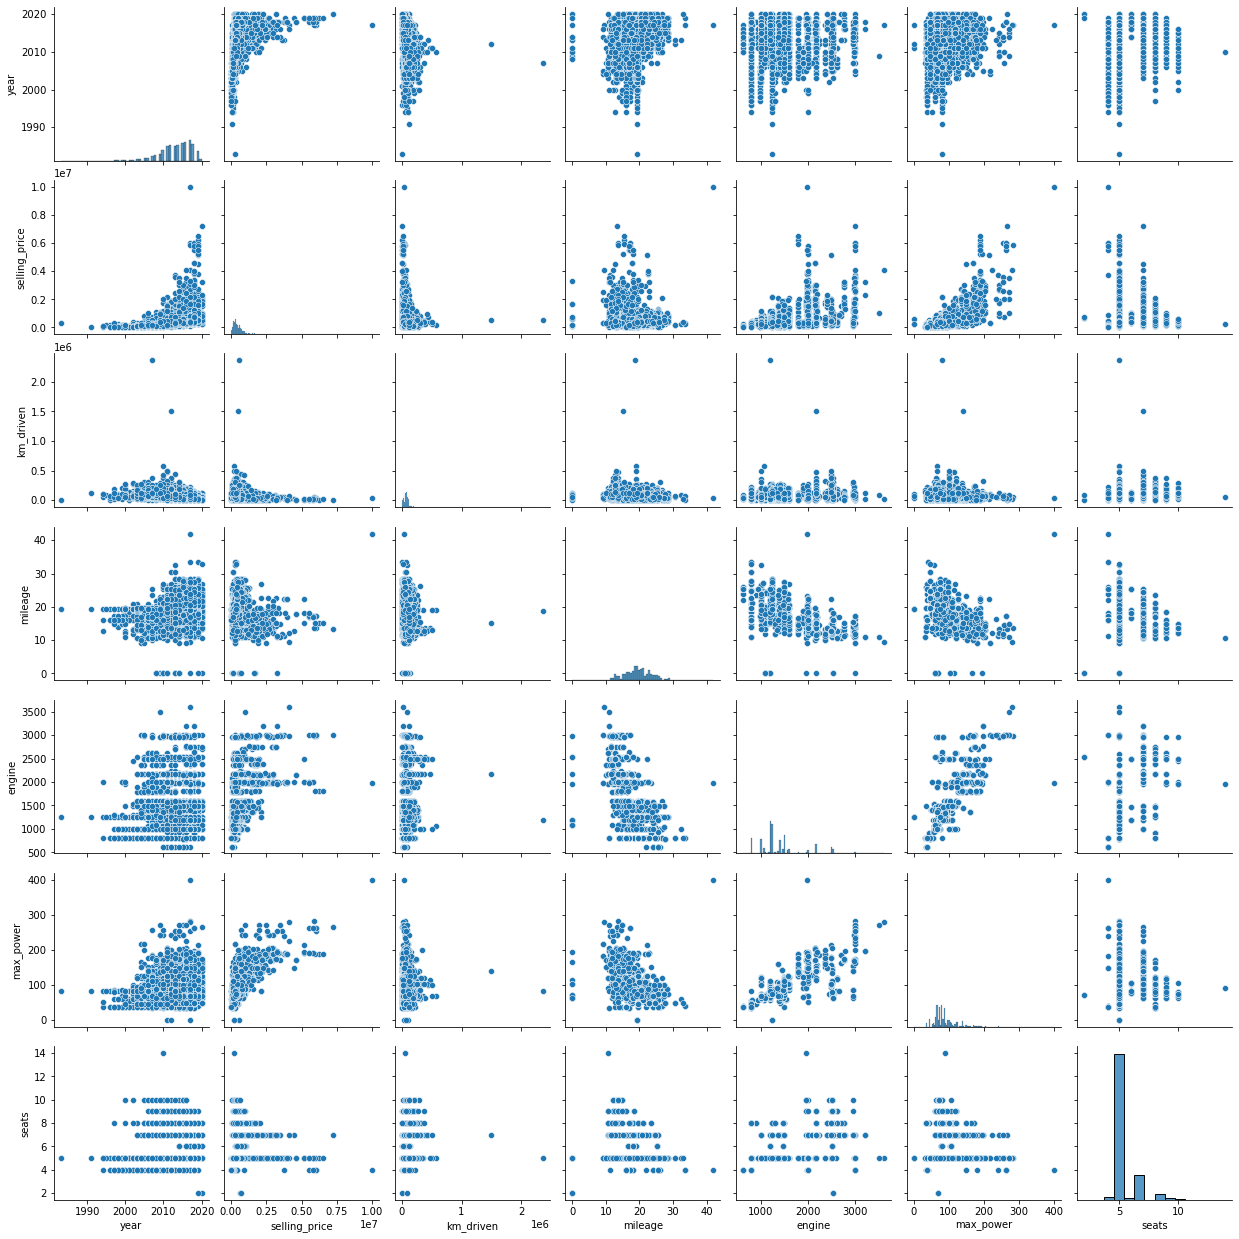

In [24]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

    1) можно заметить, что машины до 2005 года выпуска обладают одинаковой ценой, но начиная с 2005 года можно заметить положительную связь, т.к. есть машины у которых цена увеличивается вместе с годом выпуска
    2) отрицательная взаимосвязь между пробегом (km_driven) и ценой 
    3) линейной взаимосвязи между mileage и ценой не обнаружено 
    4) положительная взаимосвязь меджу engine и ценой 
    5) положительная взаимосвязь max_power и ценой
    6) отрицательная взаимосвязь между seats и ценой при кол-во сидений >= 5. Однако при сидений меньше 5

корреляция признаков:
   * у mileage отрицательная взаимосвязь с engine, max_power и seats
   * у engine полож. взаимосвязь с max_power
   * у engine отриц. взаимосвязь с seats

остальные пары признаков между собой не коррелируют

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Да, оказались похожими

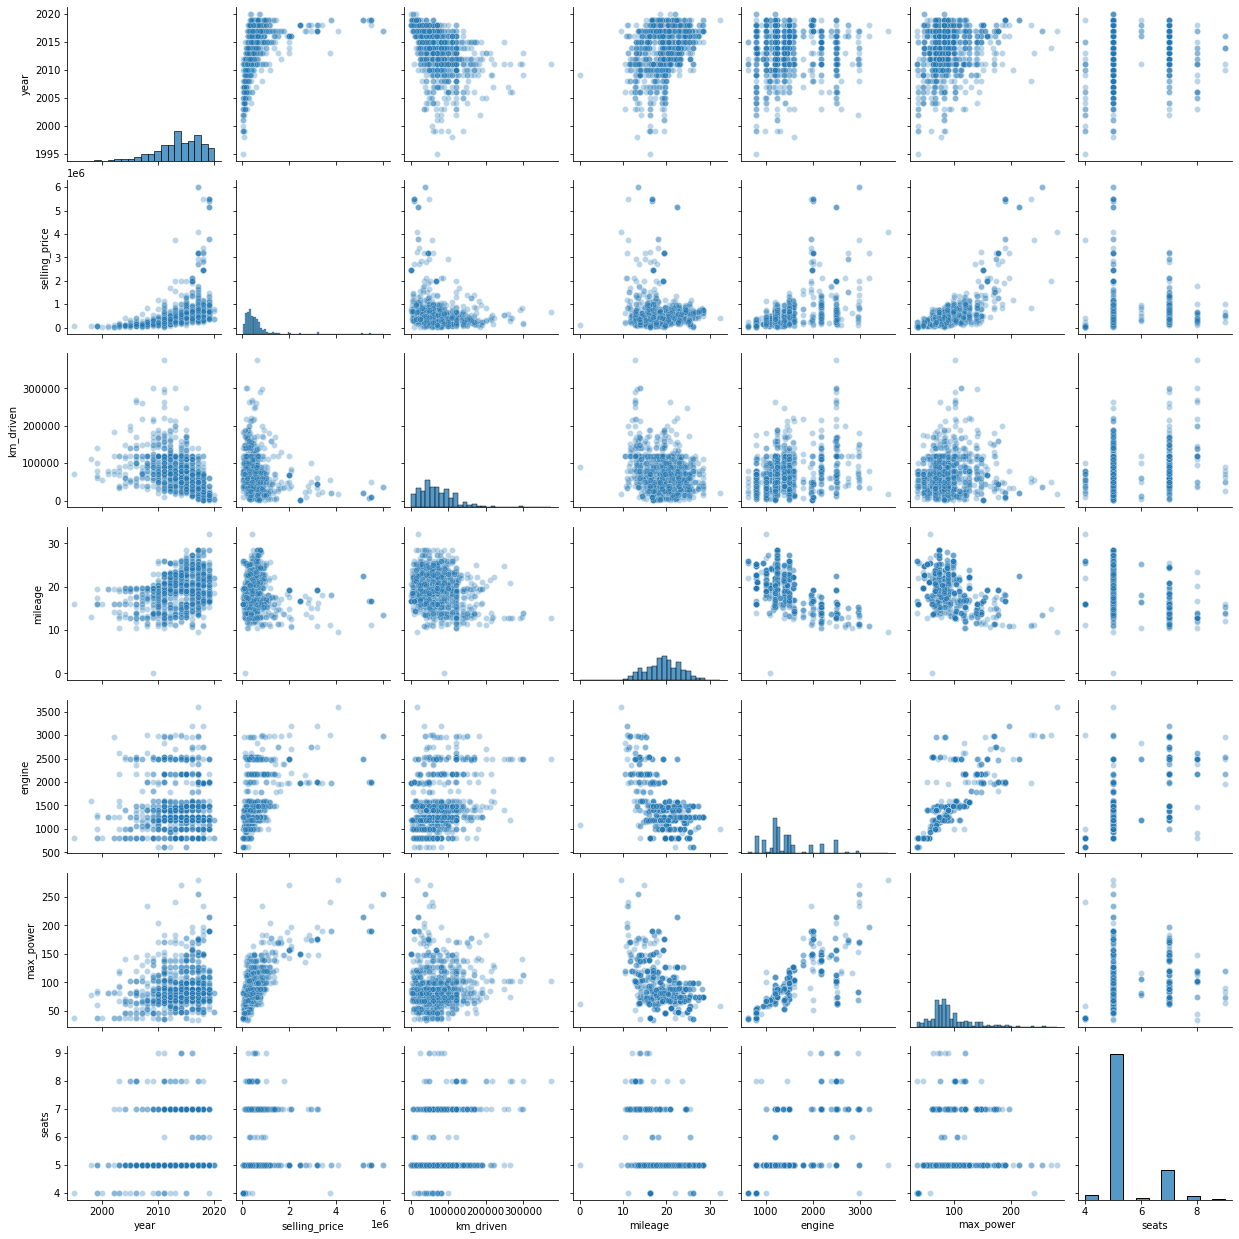

In [25]:
sns.pairplot(df_test, plot_kws={'alpha':0.3})

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

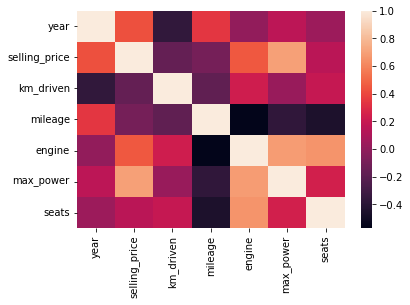

In [26]:
sns.heatmap(df_train.select_dtypes('number').corr())

In [27]:
df_train.select_dtypes('number').corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,1.000000


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* год и двигатель
* max_power и цена
* корреляция этих признаков равна -0.37. То есть чем меньше год, тем больше проехано, однако связь довольно слаба, думаю что "скорее всего" здесь не уместно. Изредка можно будет видеть данную зависимость, но не "скорее всего"

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

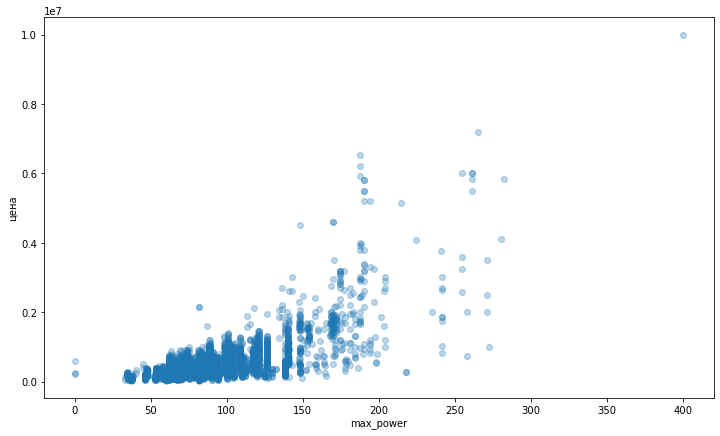

In [28]:
plt.figure(figsize=(12, 7))
plt.scatter(df_train['max_power'], df_train['selling_price'], alpha=0.3)
plt.xlabel('max_power')
plt.ylabel('цена')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

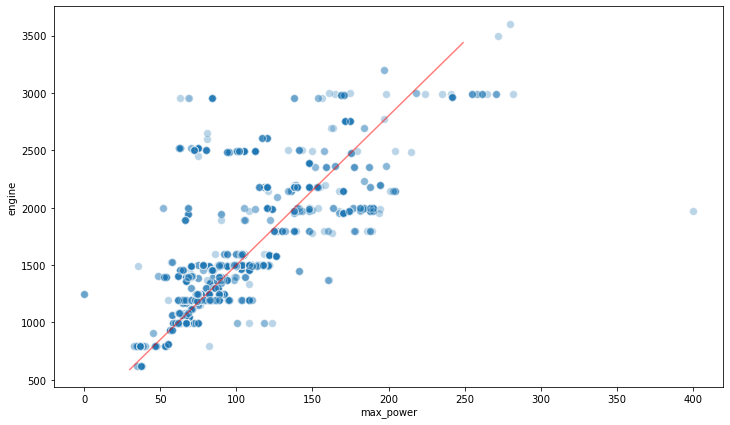

In [29]:
plt.figure(figsize=(12, 7))
plt.scatter(df_train['max_power'], df_train['engine'], s=60, edgecolors='white', alpha=0.3)
plt.plot(np.arange(30, 250), 13 * np.arange(30, 250) + 200, c='red', alpha=0.5)
plt.xlabel('max_power')
plt.ylabel('engine')
plt.show()

Довольно сильная линейная зависимость между max_power и engine (корр. равна 0.68). В целом это логично, т.к. чем больше объем двигателя, тем больше его макс. скорость при неизменяющихся остальных характеристик. 

На глаз зависимость можно апроксимировать как engine = 200 + 13 * max_power

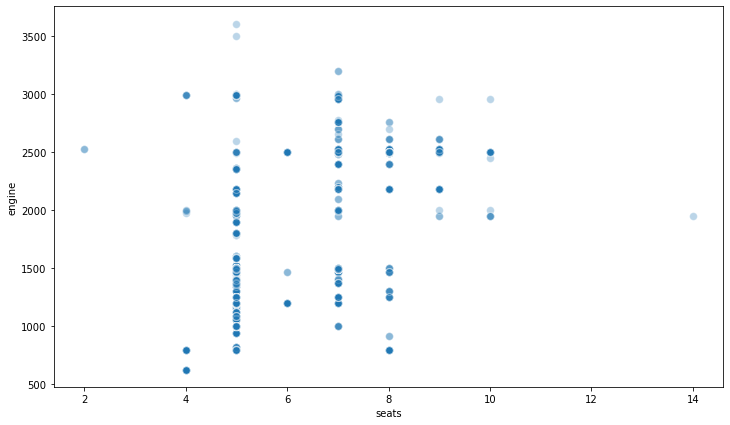

In [30]:
plt.figure(figsize=(12, 7))
plt.scatter(df_train['seats'], df_train['engine'], s=60, edgecolors='white', alpha=0.3)
plt.xlabel('seats')
plt.ylabel('engine')
plt.show()

Довольно сильная линейная зависимость между seats и engine (корр. равна 0.65). В целом это логично, т.к. большое кол-во сидений предполагает, большую по размерам машину, которая весит довольно много. Для того, чтобы такая машина ехала так же, как и машины с меньшим кол-вом сидений и, соотвественно, меньшим весом, нужен больший объем двигателя.

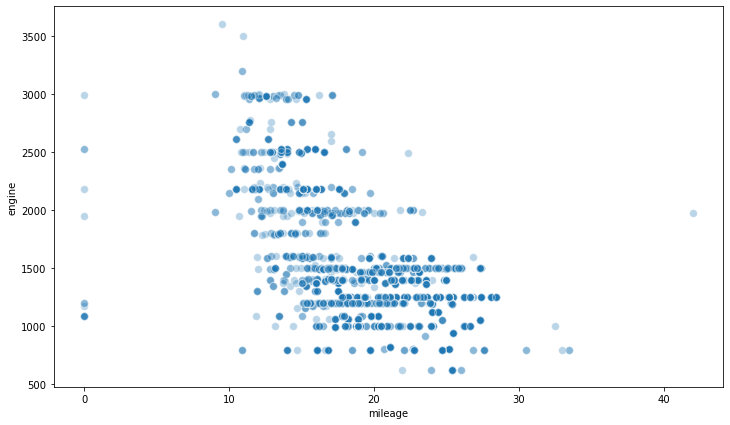

In [31]:
plt.figure(figsize=(12, 7))
plt.scatter(df_train['mileage'], df_train['engine'], s=60, edgecolors='white', alpha=0.3)
plt.xlabel('mileage')
plt.ylabel('engine')
plt.show()

Наибольшая отрицательная взаимосвязь между engine и mileage (-0.57). Mileage показывает сколько км (или миль) проедет машина на 1л. топлива. Отрицательную корреляцию можно объяснить тем, что больший объем двигателя требует больший расход топлива, поэтому зачастую у больших двигателей mileage получается маленьким

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [32]:
df_train.select_dtypes('number')

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,5
5836,2013,260000,50000,18.90,998,67.10,5
5837,2013,320000,110000,18.50,1197,82.85,5
5838,2007,135000,119000,16.80,1493,110.00,5


In [33]:
y_train = df_train['selling_price'].values
X_train = df_train.select_dtypes('number').drop('selling_price', axis=1)

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test['selling_price'].values
X_test = df_test.select_dtypes('number').drop('selling_price', axis=1)

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print('MSE (train):', MSE(y_train, y_pred_train))
print('MSE (test):', MSE(y_test, y_pred_test))
print('R2 (train):', r2_score(y_train, y_pred_train))
print('R2 (test):', r2_score(y_test, y_pred_test))

MSE (train): 116874153930.02823
MSE (test): 233298779730.45654
R2 (train): 0.5922591702157327
R2 (test): 0.59414197947884


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_tr_scaled = ss.transform(X_train)
X_te_scaled = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_tr_scaled, y_train)
y_pred_train = lr.predict(X_tr_scaled)
y_pred_test = lr.predict(X_te_scaled)
print('MSE (train):', MSE(y_train, y_pred_train))
print('MSE (test):', MSE(y_test, y_pred_test))
print('R2 (train):', r2_score(y_train, y_pred_train))
print('R2 (test):', r2_score(y_test, y_pred_test))

MSE (train): 116874153930.02892
MSE (test): 233298779730.44974
R2 (train): 0.5922591702157303
R2 (test): 0.5941419794788518


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [39]:
lr.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

In [40]:
print('Hаиболее информативным в предсказании цены оказался признак', X_train.columns[np.argmax(abs(lr.coef_))])

Hаиболее информативным в предсказании цены оказался признак max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [41]:
from sklearn.linear_model import Lasso

lr = Lasso()
lr.fit(X_tr_scaled, y_train)
y_pred_train = lr.predict(X_tr_scaled)
y_pred_test = lr.predict(X_te_scaled)
print('MSE (train):', MSE(y_train, y_pred_train))
print('MSE (test):', MSE(y_test, y_pred_test))
print('R2 (train):', r2_score(y_train, y_pred_train))
print('R2 (test):', r2_score(y_test, y_pred_test))

MSE (train): 116874153940.1429
MSE (test): 233299450599.1693
R2 (train): 0.5922591701804456
R2 (test): 0.5941408124026636


In [42]:
y_pred_test[0]

629907.6539542307

In [43]:
lr.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Не занулила, т.к. сам MSE довольно большой и сумма абс. знач. весов не сильно увеличивает итоговую функцию ошибки

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [44]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [1, 2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 100000],
#           'max_iter': [i for i in range(1000, 10000, 1000)]
         }

grid = GridSearchCV(lr, params, cv=10)
grid.fit(X_tr_scaled, y_train)
grid.best_estimator_, grid.best_score_

(Lasso(alpha=30000), 0.574889554245992)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [45]:
print(len(params['alpha']) * 10, 'моделей')

170 моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [46]:
grid.best_estimator_.fit(X_tr_scaled, y_train)
grid.best_estimator_.coef_

array([143994.61541844, -12952.81726189,      0.        ,      0.        ,
       318654.73851192,     -0.        ])

In [98]:
print('занулились веса при признаках:', X_train.columns[np.where(grid.best_estimator_.coef_ == 0)[0]].values)
print('у лучшей модели кф. рег-ции равен 30000')

занулились веса при признаках: []
у лучшей модели кф. рег-ции равен 30000


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [48]:
from sklearn.linear_model import ElasticNet

params = {'alpha': [1, 2, 10, 20, 50, 100],
         'l1_ratio': np.arange(0.1, 1, 0.1),
         }

grid = GridSearchCV(ElasticNet(), params, cv=10)
grid.fit(X_tr_scaled, y_train)
grid.best_estimator_, grid.best_score_

(ElasticNet(alpha=1, l1_ratio=0.9), 0.5761314666976897)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

alpha=1, l1_ratio=0.9

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [92]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

In [93]:
assert X_train_cat.shape == (5840, 10)

In [94]:
X_train_cat.describe(exclude='number')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [95]:
X_train_cat['seats'] = X_train_cat['seats'].astype('category')

In [96]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(sparse=False, drop='first')
data = ohe.fit_transform(X_train_cat.select_dtypes(exclude='number'))
feature_names = ohe.get_feature_names_out(X_train_cat.select_dtypes(exclude='number').columns)
df_cats = pd.DataFrame(data,columns=feature_names)
X_train_cat = pd.concat([X_train_cat.select_dtypes(include='number'), df_cats], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Да, удалось

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


params = {'alpha': [1, 2, 10, 20, 50, 100]}

grid = GridSearchCV(Ridge(), params, cv=10, scoring='r2')
grid.fit(X_train_cat, y_train)
grid.best_estimator_, grid.best_score_

(Ridge(alpha=10), 0.6218651753943542)

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

По картинкам зависимости цены от признаков видно, что если логарифмировать цену, то линейная взаимосвязь с признаками будет более выраженной $\rightarrow$ имеет смысл предсказывать логарифм цены, а потом возводить предсказания в экспоненту и получать обычные цены

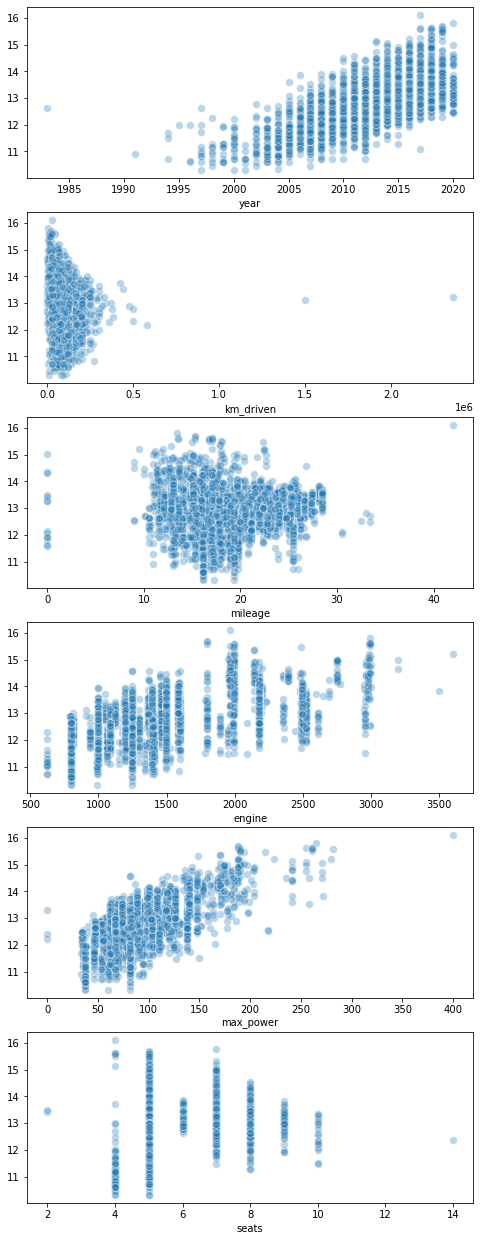

In [64]:
cols = df_train.select_dtypes('number').columns.drop('selling_price')
fig, axes = plt.subplots(len(cols), figsize=(8, 22))
for i in range(len(cols)):
    axes[i].scatter(df_train[cols[i]], np.log1p(df_train['selling_price']), s=60, edgecolors='white', alpha=0.3)
    axes[i].set_xlabel(f'{cols[i]}')

plt.show()

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder

X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_train_cat['seats'] = X_train_cat['seats'].astype('category')

prep = ColumnTransformer([
    ('scaler', StandardScaler(), X_train_cat.select_dtypes(include='number').columns),
    ('ohe', OneHotEncoder(drop='first'), X_train_cat.select_dtypes(exclude='number').columns)
])

X_train_cat = prep.fit_transform(X_train_cat)
cols = np.concatenate((prep.named_transformers_['scaler'].get_feature_names_out(),
                       prep.named_transformers_['ohe'].get_feature_names_out()))

X_train_cat = pd.DataFrame(X_train_cat, columns = cols)

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('poly', PolynomialFeatures(2)),
                  ('ridge', Ridge())])

params = {'ridge__alpha': [1, 2, 10, 20, 50, 100]
#          'l1_ratio': np.arange(0.1, 1, 0.1),
         }

grid = GridSearchCV(pipe, params, cv=10, scoring='r2')
grid.fit(X_train_cat, np.log1p(y_train))
grid.best_estimator_, grid.best_score_

(Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=10))]),
 0.853855812422796)

In [67]:
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)
X_test_cat['seats'] = X_test_cat['seats'].astype('category')

X_test_cat = prep.transform(X_test_cat)
cols = np.concatenate((prep.named_transformers_['scaler'].get_feature_names_out(),
                       prep.named_transformers_['ohe'].get_feature_names_out()))

X_test_cat = pd.DataFrame(X_test_cat, columns = cols)

In [68]:
grid.best_estimator_.fit(X_train_cat, np.log1p(y_train))
y_pred_train = np.expm1(grid.best_estimator_.predict(X_train_cat))
y_pred_test = np.expm1(grid.best_estimator_.predict(X_test_cat))
print('R2 (train):', r2_score(y_train, y_pred_train))
print('R2 (test):', r2_score(y_test, y_pred_test))

R2 (train): 0.8801131352414523
R2 (test): 0.8816855177127928


In [74]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=10))],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'ridge': Ridge(alpha=10),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'ridge__alpha': 10,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': 'deprecated',
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

Получилось даже лучше чем в гриде (вау)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [69]:
def business_metrics(y_true, y_pred):
    return ((y_pred / y_true >= 0.9) * (y_pred / y_true <= 1.1)).mean()

business_metrics(y_test, y_pred_test)

0.329

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [108]:
# инпут для 1 пункта
import json
d = df_test.drop(['name', 'selling_price'], axis=1).loc[0].to_dict()
json_object = json.dumps(d, indent = 2) 
print(json_object)

{
  "year": 2010,
  "km_driven": 168000,
  "fuel": "Diesel",
  "seller_type": "Individual",
  "transmission": "Manual",
  "owner": "First Owner",
  "mileage": 14.0,
  "engine": 2498.0,
  "max_power": 112.0,
  "seats": 7.0
}


In [128]:
# файл forfasapi.csv инпут 2 пункта
dfcsv = df_test.drop(['name', 'selling_price', 'torque'], axis=1).dropna() # дропать можно было и в ру файле, но я чето решил здесь это сделать
dfcsv.to_csv('forfastapi.csv')
# тут выведен ответ сервиса
df = pd.read_csv('response.csv', index_col=0)

In [135]:
# В фастапи старая ридж модель, поэтому скор такой
r2_score(df_test.dropna()['selling_price'].values, df['predicts'].values)

0.6435892203506816

In [59]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link